In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создание генераторов данных для обучения, валидации и тестирования
train_datagen = ImageDataGenerator(rescale=1./255)  # Нормализация пикселей
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Загрузка данных из папок
train_data = train_datagen.flow_from_directory(
    r'C:\Users\Админ\OneDrive\Рабочий стол\final\train', 
    target_size=(224, 224),  # Размер изображений (подходит для большинства моделей)
    batch_size=32,
    class_mode='categorical'  # Многоклассовая классификация
)

val_data = val_datagen.flow_from_directory(
    r'C:\Users\Админ\OneDrive\Рабочий стол\final\validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    r'C:\Users\Админ\OneDrive\Рабочий стол\final\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [2]:
print(f"Classes: {train_data.class_indices}")
print(f"Number of classes: {len(train_data.class_indices)}")
print(f"Train data: {train_data.samples} images")
print(f"Validation data: {val_data.samples} images")
print(f"Test data: {test_data.samples} images")


Classes: {'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}
Number of classes: 36
Train data: 3115 images
Validation data: 351 images
Test data: 359 images


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Замораживаем веса предобученной модели

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Количество классов
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_data, epochs=10, validation_data=val_data)


c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 1/98 ━━━━━━━━━━━━━━━━━━━━ 13:05 8s/step - accuracy: 0.0000e+00 - loss: 3.9169

c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 406s 4s/step - accuracy: 0.2387 - loss: 4.4577 - val_accuracy: 0.8376 - val_loss: 0.6223
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.8178 - loss: 0.6771 - val_accuracy: 0.8974 - val_loss: 0.3178
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.9342 - loss: 0.2842 - val_accuracy: 0.9231 - val_loss: 0.2815
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.9793 - loss: 0.1203 - val_accuracy: 0.9573 - val_loss: 0.1821
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.9876 - loss: 0.0908 - val_accuracy: 0.9601 - val_loss: 0.1497
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.9931 - loss: 0.0562 - val_accuracy: 0.9573 - val_loss: 0.1715
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.9857 - loss: 0.0613 - val_accuracy: 0.9544 - val_loss: 0.2030
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.9906 - loss: 0.0505 - val_accuracy: 0.9601 - val_loss: 0.

In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

# Загрузка предобученной модели VGG16 без верхних слоёв
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Замораживаем веса предобученной модели

# Строим модель с улучшениями
model = models.Sequential([
    base_model,
    layers.Flatten(),  # Преобразуем 2D-выходы в 1D
    layers.BatchNormalization(),  # Добавление нормализации для улучшения сходимости
    layers.Dense(512, activation='relu'),  # Полносвязный слой с ReLU активацией
    layers.Dropout(0.5),  # Dropout для предотвращения переобучения
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Слой для классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 401s 4s/step - accuracy: 0.2701 - loss: 6.7197 - val_accuracy: 0.8006 - val_loss: 0.7294
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - accuracy: 0.7687 - loss: 1.6512 - val_accuracy: 0.9202 - val_loss: 0.4178
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.8847 - loss: 0.6990 - val_accuracy: 0.9459 - val_loss: 0.3920
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.9009 - loss: 0.5571 - val_accuracy: 0.9630 - val_loss: 0.2821
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.9043 - loss: 0.5812 - val_accuracy: 0.9687 - val_loss: 0.2114
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.9278 - loss: 0.4915 - val_accuracy: 0.9601 - val_loss: 0.4277
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.9284 - loss: 0.4692 - val_accuracy: 0.9630 - val_loss: 0.3655
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.9312 - loss: 0.4434 - val_accuracy: 0.9658 - v

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers, callbacks

# Загрузка предобученной модели VGG16 без верхних слоёв
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Замораживаем веса предобученной модели

# Создание модели с улучшениями
model_improved = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Глобальный усреднённый пуллинг вместо Flatten
    layers.BatchNormalization(),  # Нормализация для стабильности
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout для уменьшения переобучения
    layers.Dense(len(train_data.class_indices), activation='softmax')
])

# Компиляция модели с уменьшенной скоростью обучения
model_improved.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Колбэки для ранней остановки и снижения скорости обучения
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Обучение модели
history_improved = model_improved.fit(
    train_data,
    epochs=20,  # Большее количество эпох для проверки эффективности
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.0531 - loss: 3.8588 - val_accuracy: 0.2051 - val_loss: 3.3515 - learning_rate: 1.0000e-04
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.1774 - loss: 3.0649 - val_accuracy: 0.4615 - val_loss: 2.9456 - learning_rate: 1.0000e-04
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.3097 - loss: 2.5849 - val_accuracy: 0.6040 - val_loss: 2.4207 - learning_rate: 1.0000e-04
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.3877 - loss: 2.2480 - val_accuracy: 0.6752 - val_loss: 1.8956 - learning_rate: 1.0000e-04
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.4529 - loss: 2.0033 - val_accuracy: 0.7664 - val_loss: 1.4775 - learning_rate: 1.0000e-04
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.5109 - loss: 1.8444 - val_accuracy: 0.7892 - val_loss: 1.1957 - learning_rate: 1.0000e-04
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.5258 

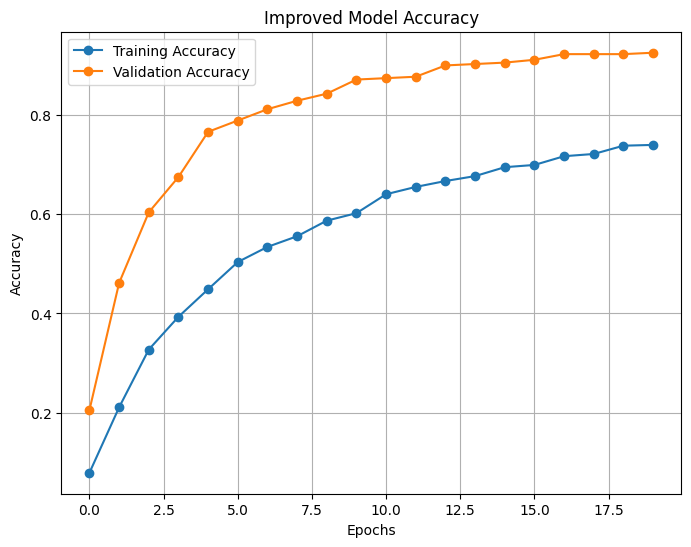

In [6]:
import matplotlib.pyplot as plt

# Функция для отображения графиков точности обучения и валидации
def plot_accuracy(history, title="Model Accuracy"):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Использование функции с историей обучения улучшенной модели
plot_accuracy(history_improved, "Improved Model Accuracy")


c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9246 - loss: 0.4111
Test Loss: 0.4004
Test Accuracy: 0.9276
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step
Classification Report:
               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00         9
     beetroot       0.09      0.10      0.10        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.00      0.00      0.00        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.00      0.00      0.00        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.00      0.00      0.00        10
       ginger       0.10      0.10      0.10        10

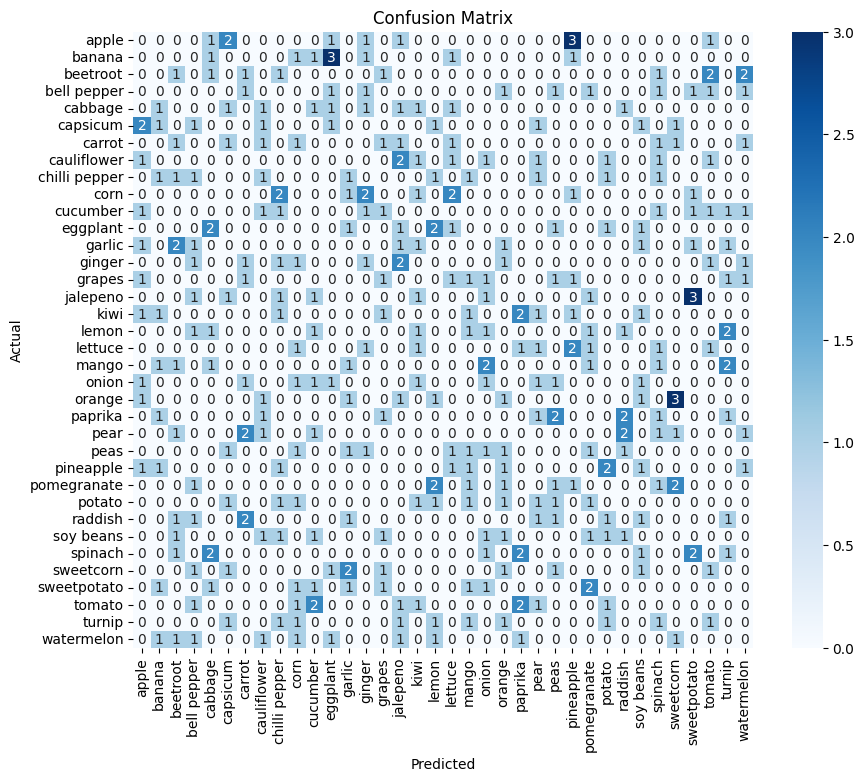

In [7]:
# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model_improved.evaluate(test_data)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Предсказания на тестовом наборе
y_pred = model_improved.predict(test_data)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_data.classes

# Генерация отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Вывод отчёта о классификации
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Разморозка последних нескольких слоев
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Замораживаем все, кроме последних 4 слоев
    layer.trainable = False

# Компиляция и обучение с более низким learning rate
model_improved.compile(
    optimizer=optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Переобучение модели
history_fine_tune = model_improved.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10


c:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 436s 4s/step - accuracy: 0.7585 - loss: 0.8743 - val_accuracy: 0.9373 - val_loss: 0.3119 - learning_rate: 1.0000e-05
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 444s 5s/step - accuracy: 0.7979 - loss: 0.7355 - val_accuracy: 0.9430 - val_loss: 0.2844 - learning_rate: 1.0000e-05
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 0.8322 - loss: 0.6432 - val_accuracy: 0.9516 - val_loss: 0.2519 - learning_rate: 1.0000e-05
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 451s 5s/step - accuracy: 0.8540 - loss: 0.5639 - val_accuracy: 0.9601 - val_loss: 0.2381 - learning_rate: 1.0000e-05
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 432s 4s/step - accuracy: 0.8681 - loss: 0.5099 - val_accuracy: 0.9601 - val_loss: 0.2085 - learning_rate: 1.0000e-05
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.8742 - loss: 0.4820 - val_accuracy: 0.9687 - val_loss: 0.1897 - learning_rate: 1.0000e-05
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 433s 4s/step - accuracy: 0.8976 - loss: 0.4

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model_improved.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Предсказания на тестовом наборе
y_pred = model_improved.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes  # Истинные классы

# Генерация отчета по классификации
class_labels = list(test_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Матрица неточностей (confusion matrix)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9696 - loss: 0.1422
Test Loss: 0.1494
Test Accuracy: 0.9666
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step

Classification Report:
               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00         9
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.00      0.00      0.00        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.00      0.00      0.00        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.10      0.10      0.10        10
         corn       0.11      0.10      0.11        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.00      0.00      0.00        10
       ginger       0.00      0.00      0.00        1

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Предсказания на тестовом наборе
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes  # Истинные классы

# Генерация отчета по классификации
class_labels = list(test_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Матрица ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9556 - loss: 0.4825
Test Loss: 0.6343
Test Accuracy: 0.9526
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step

Classification Report:
               precision    recall  f1-score   support

        apple       0.09      0.10      0.10        10
       banana       0.00      0.00      0.00         9
     beetroot       0.10      0.10      0.10        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.10      0.10      0.10        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.00      0.00      0.00        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.00      0.00      0.00        10
       ginger       0.10      0.10      0.10        1

In [14]:
model_improved.save('fine_tuned_model.h5')
